In [43]:
# Leemos los datos y separamos las columnas
import pandas as pd
import numpy as np
import sklearn as sk

In [44]:
df = pd.read_csv('Data/Estrategias.csv')
print (df.shape)

# Cargamos las predicciones
df_pred = pd.read_csv('Predicciones.csv')
print(df_pred.shape)

# Ahora, tenemos con predicciones una tabla de idCredito y su prediccion de clase, entonces hagamos un diccionario con todos los valores de idCredito y su prediccion
predicciones = df_pred.set_index('idCredito')['prediccion'].to_dict()

# Utilizando el diccionario, apliquemos a la base de datos una nueva columna dependiendo de su valor de idCredito
df['prediccion'] = df['idCredito'].map(predicciones)

# Ordenamos los datos por la columna de idCredito
df = df.sort_values(by='idCredito')

(2114172, 15)
(28602, 2)


In [45]:
df.columns

Index(['idListaCobro', 'idCredito', 'consecutivoCobro', 'montoExigible',
       'montoCobrar', 'montoCobrado', 'idRespuestaBanco', 'orden', 'idEmisora',
       'IdBanco', 'IdBancoCliente', 'prediccion', 'Estategia', 'Estrategia',
       'Costo Estrategia'],
      dtype='object')

In [46]:
df.head(10)

,idListaCobro,idCredito,consecutivoCobro,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,orden,idEmisora,IdBanco,IdBancoCliente,prediccion,Estategia,Estrategia,Costo Estrategia
0,156277,9872,41468078,969.2,969.2,0.0,4.0,0,2,2,2,0,25,BBVA CLABE INTERBANCARIA,6.00
16,156498,9872,41578001,969.2,969.2,0.0,4.0,16,5,2,2,0,0,NaN,NaN
15,156736,9872,41694545,484.6,484.6,0.0,4.0,15,5,2,2,0,0,NaN,NaN
14,156743,9872,41700604,484.6,484.6,0.0,4.0,14,2,2,2,0,0,NaN,NaN
13,156424,9872,41542181,969.2,969.2,0.0,4.0,13,5,2,2,0,0,NaN,NaN
12,156701,9872,41685860,484.6,484.6,0.0,4.0,12,5,2,2,0,0,NaN,NaN
11,156749,9872,41702921,484.6,484.6,0.0,4.0,11,5,2,2,0,0,NaN,NaN
10,156311,9872,41483305,969.2,969.2,0.0,4.0,10,5,2,2,0,9,SANTANDER CLABE TRADICIONAL,2.82
17,156333,9872,41496438,969.2,969.2,0.0,4.0,17,5,2,2,0,0,NaN,NaN
9,156378,9872,41524210,969.2,969.2,0.0,4.0,9,5,2,2,0,9,SANTANDER CLABE TRADICIONAL,2.82


In [47]:
# Agarramos los primeros 10000 registros
#df = df.head(211417)

In [48]:
# Ahora lo que hacemos es que los ordenamos por consecutivoCobro
df = df.sort_values(by='consecutivoCobro')

In [49]:
from estrategias_dict import cambios

In [50]:
# Creamos un valor acumulativo de la columna de prediccion
acumuladoOptim = [0]
# Le vamos sumando los valores de montoCobrado
for i in range(1, len(df)):
    estra = df.iloc[i]['Estategia']
    coste = cambios[estra]['Costo']
    if df.iloc[i]['idRespuestaBanco'] == 0: # O sea que si se ha pagado
        acumuladoOptim.append(acumuladoOptim[i-1] + df.iloc[i]['montoCobrado'] - coste)
    else:
        costes = cambios[estra]['Optional']
        if df.iloc[i]['prediccion'] == 1:
            acumuladoOptim.append(acumuladoOptim[i-1] + df.iloc[i]['montoCobrado'] - coste)
        else:
            acumuladoOptim.append(acumuladoOptim[i-1] + df.iloc[i]['montoCobrado'])
        

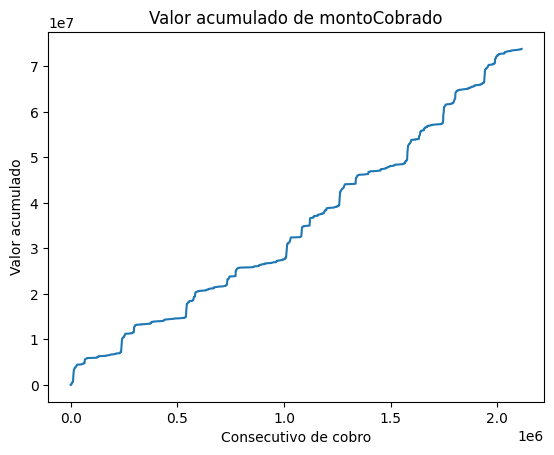

In [51]:
# Visualizamos el valor acumulado
import matplotlib.pyplot as plt
plt.plot(acumuladoOptim)
plt.title('Valor acumulado de montoCobrado')
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Valor acumulado')
plt.show()


In [52]:
# Creamos un valor acumulativo de la columna de prediccion
import random
# Creamos una distribucion binomial de 0 y 1 que se multiplica por el valor 1.75
acumulado = [0]
p = 95
# Le vamos sumando los valores de montoCobrado
for i in range(1, len(df)):
    estra = df.iloc[i]['idEmisora']
    coste = cambios[estra]['Costo']
    if df.iloc[i]['idRespuestaBanco'] == 0: # O sea que si se ha pagado
        acumulado.append(acumulado[i-1] + df.iloc[i]['montoCobrado'] - coste)
    else:
        coste = cambios[estra]['Optional']
        acumulado.append(acumulado[i-1] + df.iloc[i]['montoCobrado'] - coste)
        

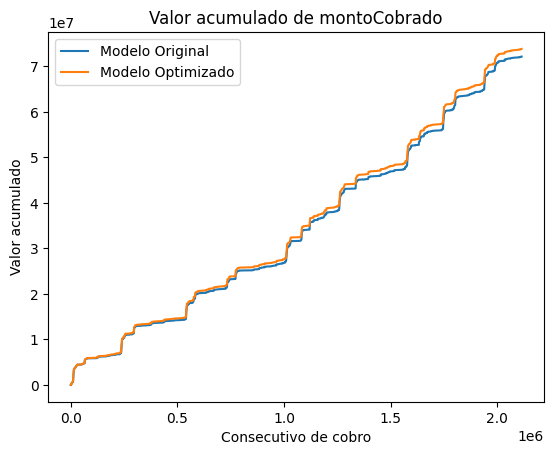

In [53]:
# Comparar con el modelo optimizado
plt.plot(acumulado, label='Modelo Original')
plt.plot(acumuladoOptim, label='Modelo Optimizado')
plt.title('Valor acumulado de montoCobrado')
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Valor acumulado')
plt.legend()
plt.show()

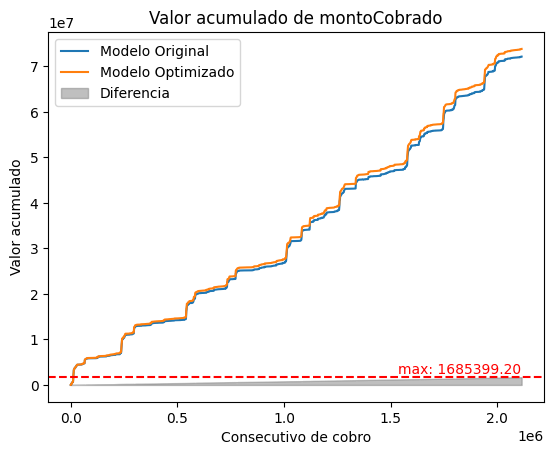

In [54]:
# Ahora haz la misma grafica, pero que haya un tercer plot que sea un plot de la diferencia entre los dos modelos, donde esta diferencia esta rellenada por debajo para que sea una area
plt.plot(acumulado, label='Modelo Original')
plt.plot(acumuladoOptim, label='Modelo Optimizado')
diff = np.array(acumuladoOptim) - np.array(acumulado)
plt.fill_between(range(len(diff)), diff, color='gray', alpha=0.5, label='Diferencia')
# Agrega una linea horizontal en el el eje y con valor al valor maximo de la diferencia y agrega un texto que diga "Diferencia maxima"
plt.axhline(y=max(diff), color='r', linestyle='--')
plt.text(len(diff)-1, max(diff), f'max: {max(diff):.2f}', color='r', fontsize=10, ha='right', va='bottom')
plt.title('Valor acumulado de montoCobrado')
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Valor acumulado')
plt.legend()
plt.show()

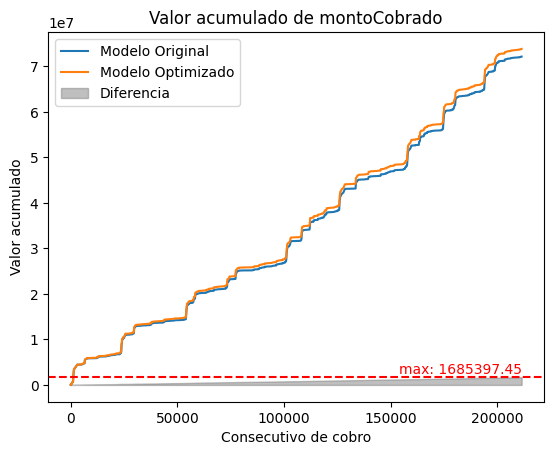

In [62]:
# Hacer lo mismo que el anterior pero solo visualizando saltos de 10 en 10
plt.plot(acumulado[::10], label='Modelo Original')
plt.plot(acumuladoOptim[::10], label='Modelo Optimizado')
diff = np.array(acumuladoOptim[::10]) - np.array(acumulado[::10])
plt.fill_between(range(len(diff)), diff, color='gray', alpha=0.5, label='Diferencia')
# Agrega una linea horizontal en el el eje y con valor al valor maximo de la diferencia y agrega un texto que diga "Diferencia maxima"
plt.axhline(y=max(diff), color='r', linestyle='--')
plt.text(len(diff)-1, max(diff), f'max: {max(diff):.2f}', color='r', fontsize=10, ha='right', va='bottom')
plt.title('Valor acumulado de montoCobrado')
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Valor acumulado')
# Hacer un log en el eje y

plt.legend()
plt.show()

In [56]:
# Ver el por centaje de diferencia entre los dos modelos
porcentajeDiferencia = (np.array(acumuladoOptim) - np.array(acumulado)) / np.array(acumulado) * 100
print(f'Porcentaje de diferencia entre los dos modelos: {np.mean(porcentajeDiferencia):.2f}%')

Porcentaje de diferencia entre los dos modelos: nan%


C:\Users\Felip\AppData\Local\Temp\ipykernel_27428\3632677377.py:2: RuntimeWarning: invalid value encountered in divide
  porcentajeDiferencia = (np.array(acumuladoOptim) - np.array(acumulado)) / np.array(acumulado) * 100


In [63]:
import json

# Crear un DataFrame con los resultados cada 10 valores
df_resultados = pd.DataFrame({
    'original': acumulado[::1000],
    'optimizado': acumuladoOptim[::1000]
})

# Guardar el DataFrame como JSON
df_resultados.to_json('Data/Resultados.json', orient='records')
